In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
import os

path = "../input"  # Chemin racine où les datasets Kaggle sont stockés
data = os.listdir(path)
print("Datasets disponibles :", data)


Datasets disponibles : ['sign-language-mnist']


In [3]:
dataset_name = "sign-language-mnist"  
files = os.listdir(f"{path}/{dataset_name}")
print("Fichiers disponibles :", files)

Fichiers disponibles : ['sign_mnist_test.csv', 'sign_mnist_test', 'sign_mnist_train', 'amer_sign2.png', 'amer_sign3.png', 'sign_mnist_train.csv', 'american_sign_language.PNG']


In [4]:
# Définir le chemin des fichiers
train_csv_path = "../input/sign-language-mnist/sign_mnist_train.csv"
test_csv_path = "../input/sign-language-mnist/sign_mnist_test.csv"

# Charger les datasets
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

print("Aperçu des données d'entraînement :")
print(df_train.head())

print("\nAperçu des données de test :")
print(df_test.head())


Aperçu des données d'entraînement :
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel

In [5]:
import numpy as np

# Séparer les features (X) et les labels (y)
X_train = df_train.iloc[:, 1:].values  # Toutes les colonnes sauf la première
y_train = df_train.iloc[:, 0].values   # La première colonne contient les labels

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

print(f"Shape des données d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Shape des données de test : {X_test.shape}, {y_test.shape}")

Shape des données d'entraînement : (27455, 784), (27455,)
Shape des données de test : (7172, 784), (7172,)


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train = X_train.reshape(-1, 28, 28)  # Images 28x28 en niveaux de gris (1 canal)
X_test = X_test.reshape(-1, 28, 28)

print(f"Nouvelle shape des images d'entraînement : {X_train.shape}")
print(f"Nouvelle shape des images de test : {X_test.shape}")

Nouvelle shape des images d'entraînement : (27455, 28, 28)
Nouvelle shape des images de test : (7172, 28, 28)


In [8]:
from sklearn.preprocessing import OneHotEncoder
# Encoder les labels en one-hot
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

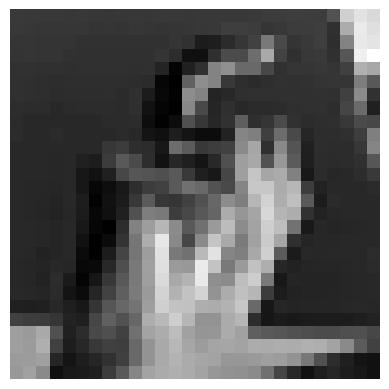

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X_train[27454]
plt.imshow(some_digit, cmap="binary")
plt.axis("off")
plt.show()

In [10]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construire le modèle MLP
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),  # 28x28 = 784
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(24, activation='softmax')  # 24 classes pour les lettres de l'alphabet (sans J et Z)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
